In [4]:
from sklearn.datasets import make_regression
import numpy as np


In [7]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

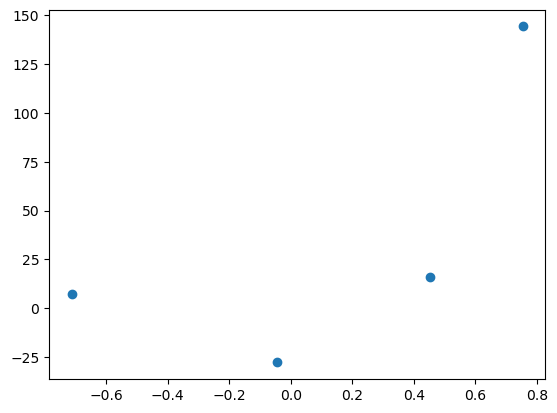

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [9]:
#using ols
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [10]:
print(lr.intercept_)
print(lr.coef_)

26.15963284313262
[78.35063668]


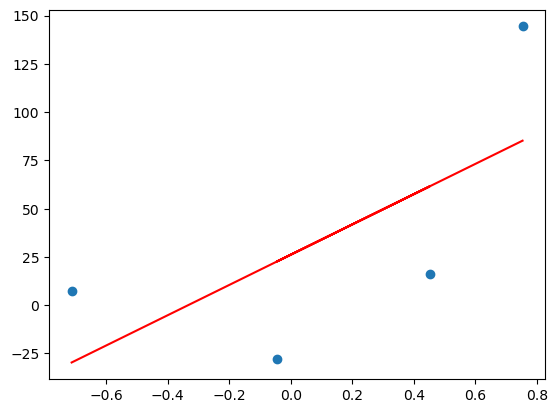

In [15]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

In [16]:
 #blue dots are actual points where as read line is predicted one
# let us apply gradiant decent assuming sloe to be constatnt m=78.35
# lets assume the starting value of b is 0
y_pred=((78.35)*X+0)

In [21]:
y_pred.reshape(4)#its 2d we are making it 1d

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

<h3>1st ITERATION<h3>

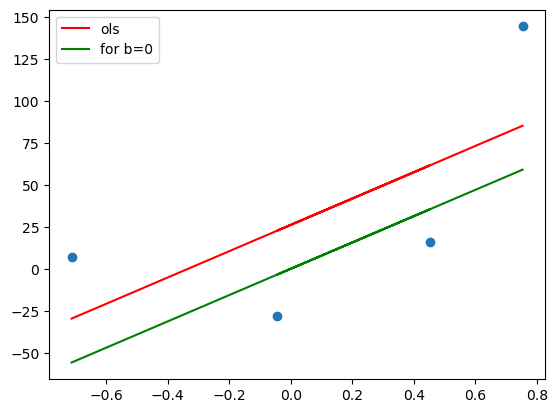

In [25]:
#comparing between the ols libe and line when we assume m to be constaant and b to be 0

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='ols')
plt.plot(X,y_pred,color='green',label='for b=0')
plt.legend()
plt.show()
# we can observe that the line is far away hence we need to make it come close

<h3>
2nd ITERATION<H3

In [33]:
m=78.35
b=0
loss_slope=-2*np.sum(y-m*X.ravel()-b)
lean_rate=0.1
step_size=lean_rate*loss_slope#(n*(slope))

#bnew=bold-(n*(slope))
b=b-step_size
print("step_size",step_size)
print("newb",b)

step_size -20.927763408209216
newb 20.927763408209216


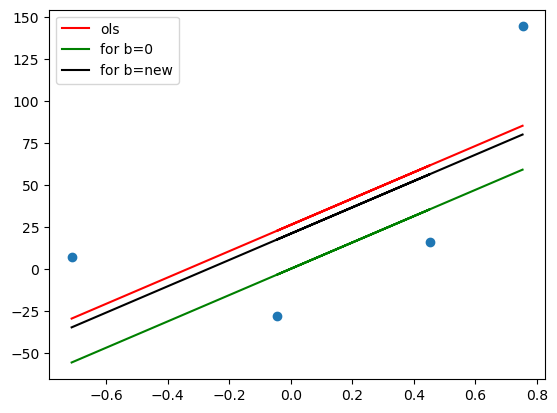

In [34]:
# we have got the new b value now lets plot grapg for it
y_pred1=((m*X)+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='ols')
plt.plot(X,y_pred,color='green',label='for b=0')
plt.plot(X,y_pred1,color='black',label='for b=new')
plt.legend()
plt.show()

<H3>3RD ITERATION<H3>

In [35]:
#we can observe thst now with new b its more closerer to ols line
loss_slope=-2*np.sum(y-m*X.ravel()-b)
lean_rate=0.1
step_size=lean_rate*loss_slope#(n*(slope))

#bnew=bold-(n*(slope))
b=b-step_size
print("step_size",step_size)
print("newb",b)

step_size -4.185552681641844
newb 25.11331608985106


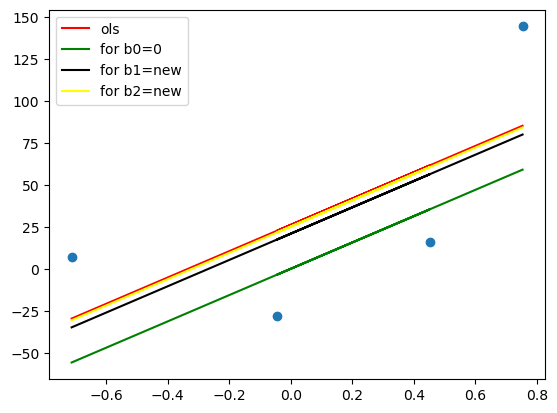

In [38]:
y_pred2=((m*X)+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='ols')
plt.plot(X,y_pred,color='green',label='for b0=0')
plt.plot(X,y_pred1,color='black',label='for b1=new')
plt.plot(X,y_pred2,color='yellow',label='for b2=new')
plt.legend()
plt.show()

In [ ]:
#its now more closer that means eventually it will overlap red line

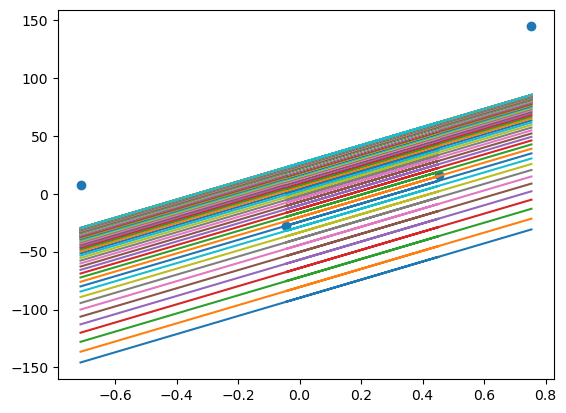

In [48]:
#PUTTING IT ALL TOGETHER
b=-100
m=78.35
learn_rate=0.01
epochs=100
for i in range(epochs):
    loss_slope=-2*np.sum(y-m*X.ravel()-b)
    step_size=learn_rate*loss_slope#(n*(slope))
    #bnew=bold-(n*(slope))
    b=b-step_size
    y_pred=((m*X)+b)
    
    plt.plot(X,y_pred)
plt.scatter(X,y)

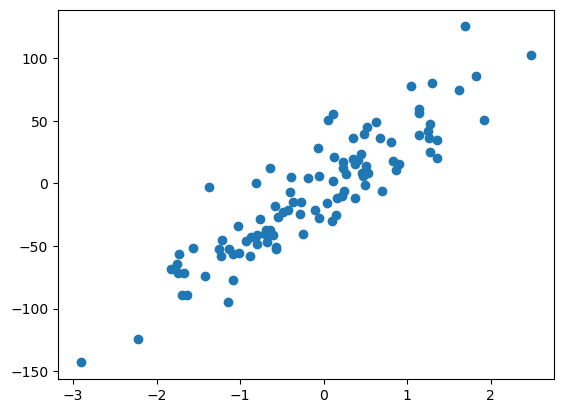

In [55]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)
plt.scatter(X,y)


In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [59]:
print(lr.coef_)
print(lr.intercept_)

[42.93550448]
-3.1039407725941954


In [60]:
m=42.93


In [67]:
class GDRegressor:
    def __init__(self,learning_rate,epoch):
        self.m=42.93
        self.b=-120
        self.learning_rate=learning_rate
        self.epoch=epoch
    def fit(self,X,y):
        for i in range(self.epoch):
            loss_slope=-2*np.sum(y-self.m*X.ravel()-self.b)
            self.b=self.b-(self.learning_rate*loss_slope)
        print(self.b)
            
        
        

In [69]:
gd=GDRegressor(0.001,100)#depending on value of learning rate and epoch everything depends
gd.fit(X,y)

-3.104535974086083


In [71]:
from sklearn.datasets import make_regression
# from sklearn.matrix import r2_score

In [74]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

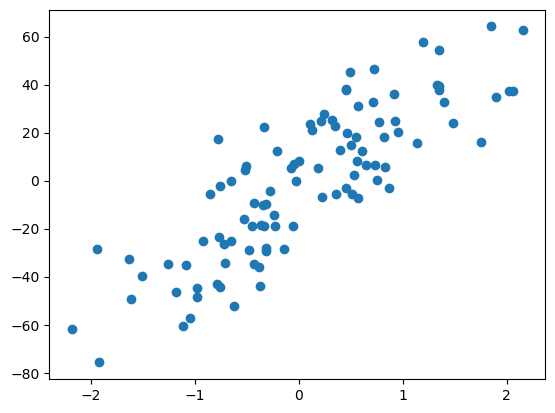

In [75]:
plt.scatter(X,y)

In [77]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [78]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [84]:
class GDRegressor:
    def __init__(self,learning_rate,epoch):
        self.m=100
        self.b=-120
        self.learning_rate=learning_rate
        self.epoch=epoch
    def fit(self,X,y):
        for i in range(self.epoch):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b=self.b-(self.learning_rate*loss_slope_b)
            self.m=self.m-(self.learning_rate*loss_slope_m)
        print(self.b,self.m)
    def predict(self,X):
        return self.m*X+self.b
            
        
        

In [86]:
gd=GDRegressor(0.001,100)
gd.fit(X,y)
gd.predict(X).reshape(100)

-2.2947448944994893 27.828091872608653


array([-22.11921769, -14.45967436, -14.92180785,  24.22071289,
         4.32438488,  21.67112435,  -9.06605019,   2.851948  ,
       -22.35879005, -14.25796038,  53.78500537,   8.75972323,
         3.48793408,  -8.76271341, -23.68416824,  10.31579463,
        15.5120051 ,   7.71035286, -47.24011768,  46.38331635,
       -24.25080397, -16.54175657, -28.12854285,  57.54630988,
        -8.06489135, -47.90758693, -11.71784478, -11.25883162,
       -15.69039288, -16.85340673,  17.79616505,  19.01909815,
        10.32476716, -37.40283105, -63.15798965, -35.28268842,
         3.75651986,  34.72543668, -32.54893408,  13.35192552,
       -44.39433775,  -2.36122692, -10.03469777,  10.27833038,
        30.84031082,  23.3723328 ,  20.38502317, -19.5754251 ,
        23.13291539,  29.38289173,  38.85425766, -20.41240441,
       -12.75588011, -23.85205547,  11.65094979,  35.27840802,
        17.99653881,  -4.5669519 , -26.06391348,  10.66362793,
        -3.53318065,  -3.89576147,  50.37665946, -31.38

In [97]:
#same code on training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [98]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [99]:
print(lr.intercept_)
print(lr.coef_)

-2.271014426178382
[28.12597332]


In [100]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.6345158782661013

In [101]:
#now check same r2 using gd
class GDRegressor:
    def __init__(self,learning_rate,epoch):
        self.m=100
        self.b=-120
        self.learning_rate=learning_rate
        self.epoch=epoch
    def fit(self,X,y):
        for i in range(self.epoch):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b=self.b-(self.learning_rate*loss_slope_b)
            self.m=self.m-(self.learning_rate*loss_slope_m)
        print(self.b,self.m)
    def predict(self,X):
        return self.m*X+self.b
            
        
        

In [103]:
gd=GDRegressor(0.001,100)
gd.fit(X_train,y_train)


-2.2710234077993587 28.12598618006269


In [104]:
y_pred=gd.predict(X_test)
r2_score(y_test,y_pred)

0.634515826773629

In [ ]:
#hence we get same values also using the ols and gd


In [105]:
 !git init

Reinitialized existing Git repository in C:/Users/TANUSHREE/Desktop/campusx/dsalgo/.git/


In [106]:
   !git remote add origin https://github.com/TANUSHRI-BHISE/LinearRegression.git
   

error: remote origin already exists.


In [107]:
!git push -u origin main 

branch 'main' set up to track 'origin/main'.


Everything up-to-date


In [108]:
!git add .

In [110]:
!git remote -v

origin	https://github.com/TANUSHRI-BHISE/LinearRegression.git (fetch)
origin	https://github.com/TANUSHRI-BHISE/LinearRegression.git (push)


In [112]:
!git add .

In [113]:
! git commit -m "uploaded"

[main d0de4da] uploaded
 4 files changed, 2292 insertions(+), 6 deletions(-)
 create mode 100644 .ipynb_checkpoints/Gradientdescent-checkpoint.ipynb
 create mode 100644 Gradientdescent.ipynb


In [114]:
!git branch -m main
!git push -u origin main


branch 'main' set up to track 'origin/main'.


To https://github.com/TANUSHRI-BHISE/LinearRegression.git
   7caafa3..d0de4da  main -> main
